In [1]:
import warnings
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#%matplotlib inline  


Matriz de confusion

[[13  0  0]
 [ 0 17  2]
 [ 0  0 18]]


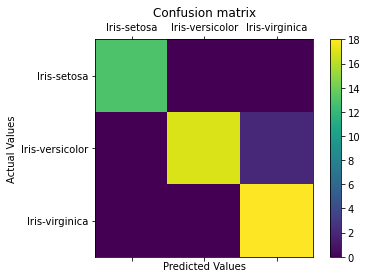

In [3]:
#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url)
# df = df.values
X = df.iloc[:,0:4]
y = df.iloc[:,4]
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7
#Split data into train and test set. 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#Train Model
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

#Construct the Confusion Matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Exactitud del modelo

In [5]:
#import modules
import warnings
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score

#ignore warnings
warnings.filterwarnings('ignore')  # Ignora las advertencias para mantener el resultado más limpio

# Load iris dataset
iris = datasets.load_iris()  # Carga el conjunto de datos Iris

# Create feature matrix
X = iris.data  # Crea la matriz de características (datos de entrada)

# Create target vector
y = iris.target  # Crea el vector de destino (etiquetas de clase)

# Test size
test_size = 0.33  # Tamaño del conjunto de prueba (33% de los datos se utilizarán para pruebas)

# Generate the same set of random numbers
seed = 7  # Semilla para generar números aleatorios, asegura la reproducibilidad de los resultados

# Cross-validation settings with shuffle=True
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)  # Configuración de validación cruzada con mezcla aleatoria de datos

# Model instance
model = LogisticRegression()  # Crea una instancia del modelo de regresión logística

# Evaluate model performance
scoring = 'accuracy'  # Métrica de evaluación del modelo (precisión)
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)  # Evalúa el rendimiento del modelo mediante validación cruzada
print('Accuracy - val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))  # Imprime la precisión media y la desviación estándar en el conjunto de validación

# Split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)  # Divide los datos en conjuntos de entrenamiento y prueba

# Fit model
model.fit(X_train, y_train)  # Entrena el modelo con los datos de entrenamiento

# Accuracy on test set
result = model.score(X_test, y_test)  # Calcula la precisión del modelo en el conjunto de prueba
print("Accuracy - test set: %.2f%%" % (result*100.0))  # Imprime la precisión del modelo en el conjunto de prueba


Accuracy - val set: 96.67% (0.05)
Accuracy - test set: 92.00%


Puntuación F1

In [8]:
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
test_size = 0.33
seed = 7

model = LogisticRegression()
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test)
precision = precision_score(y_test, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred)
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)

Precision: 0.701493
Recall: 0.552941
F1 score: 0.618421


Curva de características operativas del receptor

AUC - Test Set: 82.85%


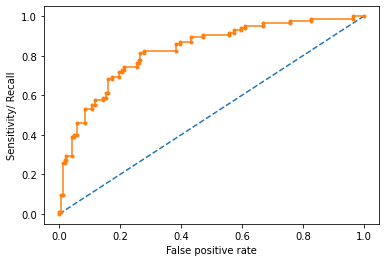

In [9]:
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

Pérdida logaritmica 

In [10]:
#Classification LogLoss
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

warnings.filterwarnings('ignore')
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
#predict and compute logloss
pred = model.predict(X_test)
accuracy = log_loss(y_test, pred)
print("Logloss: %.2f" % (accuracy))


Logloss: 7.89


Índice Jaccard

In [12]:
import numpy as np

def compute_jaccard_similarity_score(x, y):
    intersection_cardinality = len(set(x).intersection(set(y)))
    union_cardinality = len(set(x).union(set(y)))
    return intersection_cardinality / float(union_cardinality)

score = compute_jaccard_similarity_score(np.array([0, 1, 2, 5, 6]), np.array([0, 2, 3, 5, 7, 9]))
print("Jaccard Similarity Score : %s" %score)
pass

Jaccard Similarity Score : 0.375


In [14]:
from scipy.stats import kstest 
import random 
  
# N = int(input("Enter number of random numbers: ")) 
N = 10
  
actual =[] 
print("Enter outcomes: ") 
  
for i in range(N): 
    # x = float(input("Outcomes of class "+str(i + 1)+": ")) 
    actual.append(random.random()) 
  
print(actual) 
x = kstest(actual, "norm")    
print(x)

Enter outcomes: 
[0.7103009008425007, 0.08925379202907713, 0.5046269447195019, 0.88507940219521, 0.9430640419050108, 0.8357506004013593, 0.10453378573530081, 0.049522923278651154, 0.644003359638795, 0.27213929433114636]
KstestResult(statistic=0.5197487152622198, pvalue=0.004877713794629955)
